# Wordclouds

Wordclouds are excellent ways to summarize textual information like reviews, customer feedback, documents etc. The first part of this excercise focuses on creating a word cloud from the text descriptions in the wine dataset that you have seen earlier in Part 1.

In [1]:
!pip install wordcloud

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

**Load the Data files**

In [3]:
! git clone https://github.com/vibsabhishek/EP290.git

Cloning into 'EP290'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 38 (delta 13), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [4]:
# Load in the dataframe
df = pd.read_csv("EP290/winemag-data-2500.csv", index_col=0)

In [5]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
print(df.description[0])

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.


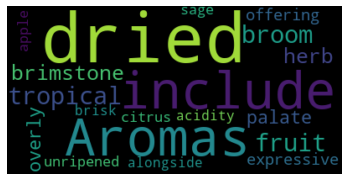

In [7]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
print(text)

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.


In [9]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [10]:
#combine all the descriptions into one big text variable
text = " ".join(description for description in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 599872 words in the combination of all review.


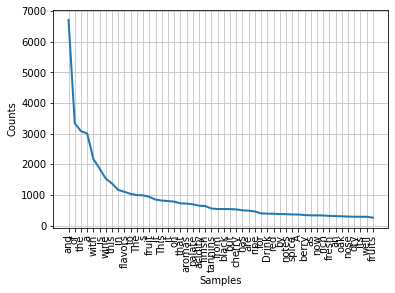

In [11]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(50)

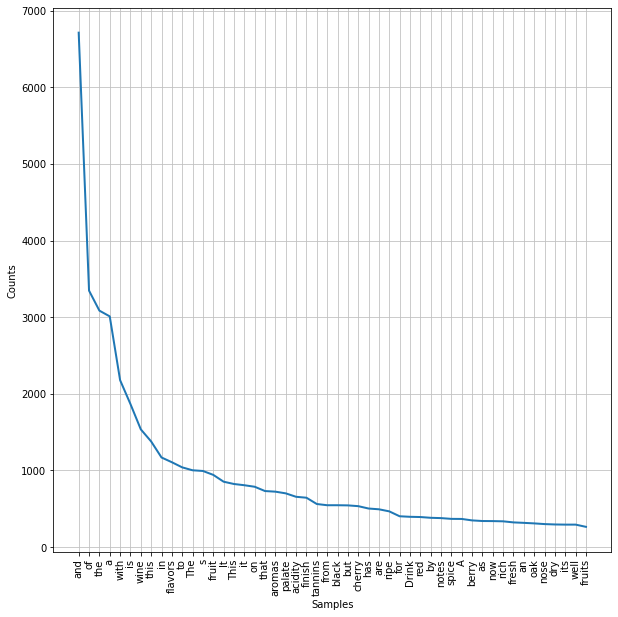

In [12]:
plt.rcParams["figure.figsize"] = (10,10)
freq.plot(50)

## Q1. Plot the distribution of the entire corpus

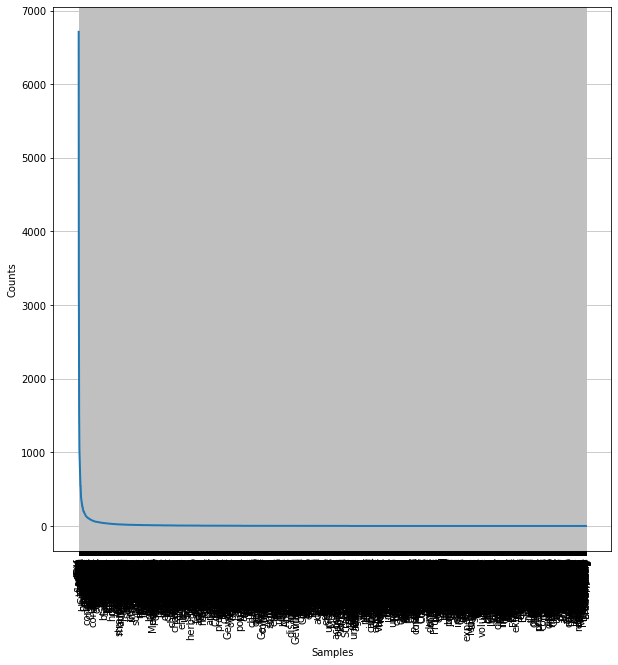

In [13]:
freq.plot()

## Zipf's law

The distribution of text follows a Zipf's or scale-free distribution. This is quite characteristic of any naturally occuring text corpus, irrespective of language. 

## Q2. What is the most commonly occuring word?


### Stopwords

Some words like the, and etc. even though commonly occuring do not add a lot of value as they are not unique to the context. In addition, we might wish to remove commonly occuring words for a specific context, e.g. "wine", and "drink". 

In [14]:
# Create stopword list:
stopwords = set(STOPWORDS)

## Q3. Add a set of stopwords specific to the wine descriptions and generate another wordcloud

In [15]:
stopwords.update(["wine"])

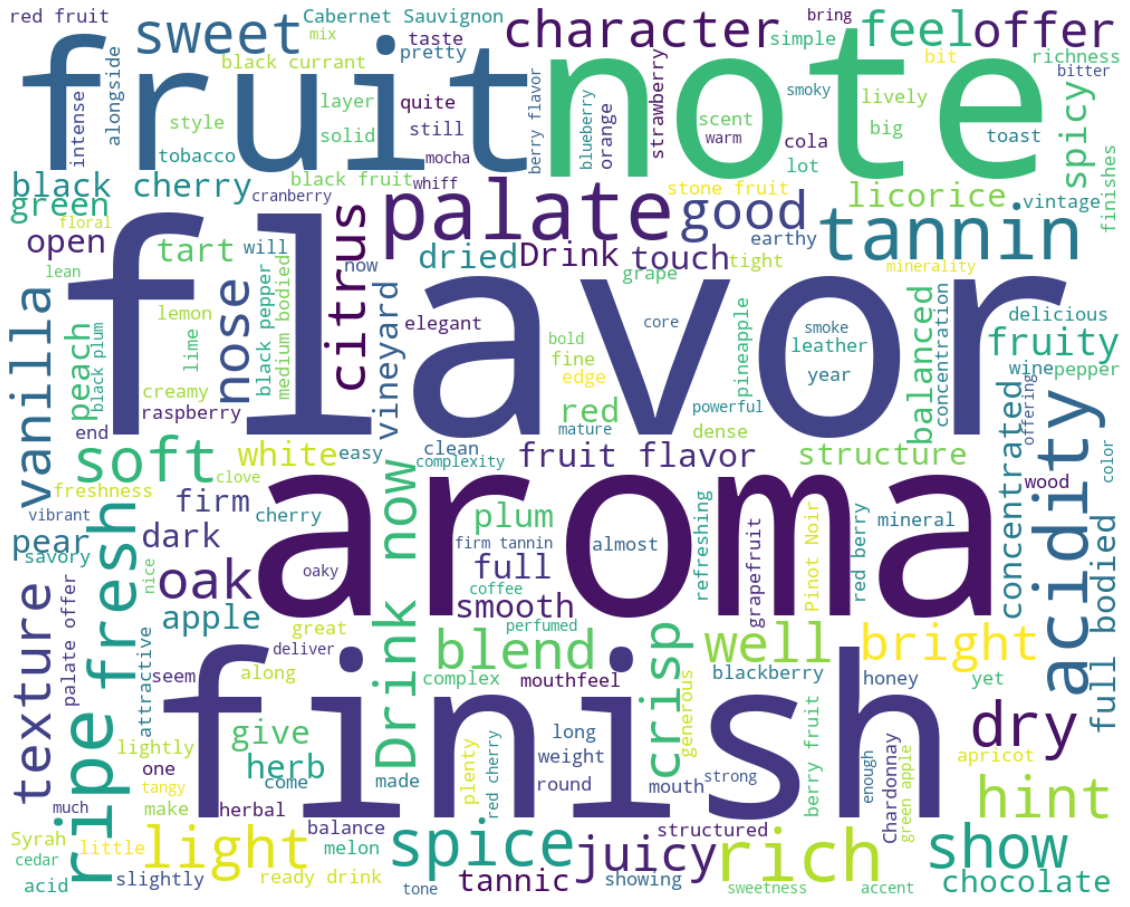

In [16]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1000, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

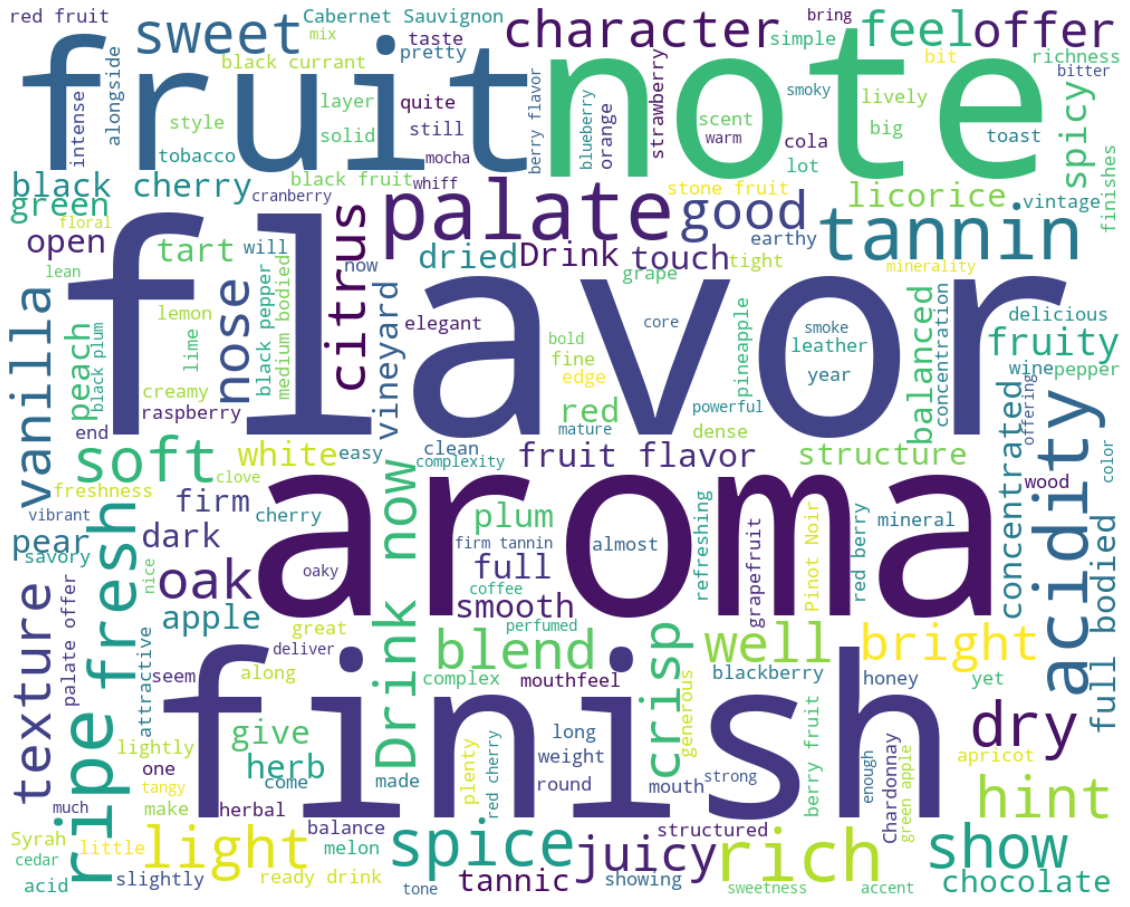

In [17]:
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Apply an image mask

In [18]:
wine_mask = np.array(Image.open("EP290/winemask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

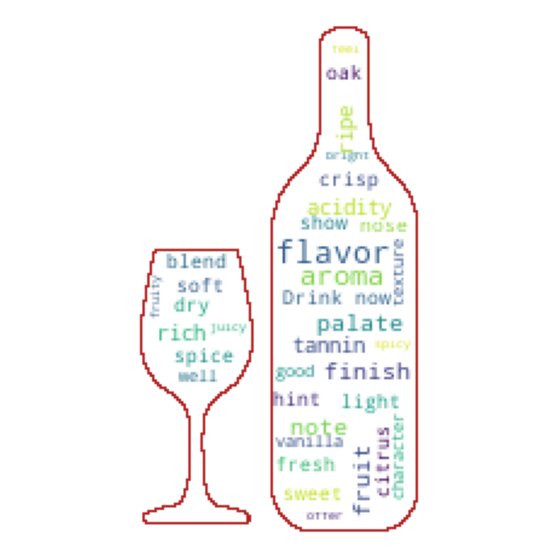

In [19]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

# Check the expected result of your mask
transformed_wine_mask

# Create a word cloud image
wc = WordCloud(background_color="white", mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick', width=1000, height=800)

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.axis("off")
plt.show()

## Q4. Create the world cloud for the abstracts in COVID data (in file: EP290/covid19_small.csv)

In [20]:
df = pd.read_csv("EP290/covid19_small.csv", index_col=0)

In [21]:
df.abstract[1]

'An emerging disease is one infectious epidemic caused by a newly transmissible pathogen, which has either appeared for the first time or already existed in human populations, having the capacity to increase rapidly in incidence as well as geographic range. Adapting to human immune system, emerging diseases may trigger large-scale pandemic spreading, such as the transnational spreading of SARS, the global outbreak of A(H1N1), and the recent potential invasion of avian influenza A(H7N9). To study the dynamics mediating the transmission of emerging diseases, spatial epidemiology of networked metapopulation provides a valuable modeling framework, which takes spatially distributed factors into consideration. This review elaborates the latest progresses on the spatial metapopulation dynamics, discusses empirical and theoretical findings that verify the validity of networked metapopulations, and the application in evaluating the effectiveness of disease intervention strategies as well.'


# Sentiment analysis

Here we will try to find the sentiment of various text, a very common application of NLP.

## Import packages
Make sure you installed ***sklearn***, ***matplotlib*** and ***numpy*** if you use your local machine

In [22]:
!pip install -U textblob
!pip install vaderSentiment
!python -m textblob.download_corpora

     |████████████████████████████████| 636 kB 8.8 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
     |████████████████████████████████| 125 kB 8.9 MB/s 
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

##**Sentiment Analysis using VADER**

*   For compound > 0.05 - Positive
*   For compound < -0.05 - Negative
*   else Neutral



In [24]:
vader = SentimentIntensityAnalyzer()
text_sentiment = vader.polarity_scores("VADER is amazingly simple to use. What great fun!")
print(text_sentiment)

{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.8268}


In [25]:
text_sentiment = vader.polarity_scores("VADER is terrible to use. What a shame!")
print(text_sentiment)

{'neg': 0.52, 'neu': 0.48, 'pos': 0.0, 'compound': -0.7574}


In [26]:
text_sentiment = vader.polarity_scores("He is not going to hate that.")
print(text_sentiment)

{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4585}


## **Sentiment analysis on IMDB review dataset**

In [32]:
!pip install --upgrade xlrd
!pip install --upgrade pandas
import pandas as pd
df = pd.read_excel("EP290/IMDB_Dataset_small.xls", header=0)

ImportError: ignored

In [ ]:
df.head()

In [ ]:
len(df)

## Q5. Show the distribution of words containted in the IMDB reviews.

In [ ]:
#some helper function to measure sentiment
def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']

def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [ ]:
print("Review:", df.review[0],"\n Sentiment:", df.sentiment[0])

###Compute Sentiment for the entire dataset using VADER

In [ ]:
vader = SentimentIntensityAnalyzer()
df['vader_pos'] = df.review.apply(detect_vader_pos)
df['vader_neg'] = df.review.apply(detect_vader_neg)
df['vader_comp'] = df.review.apply(detect_vader_comp)

In [ ]:
#Visualize the results
plt.figure(figsize=[4,4])

ax = sns.violinplot(x="sentiment", y="vader_comp", data=df)

In [ ]:
plt.figure(figsize=[4,4])
ax = sns.violinplot(x="sentiment", y="vader_pos", data=df)

In [ ]:
plt.figure(figsize=[4,4])
ax = sns.violinplot(x="sentiment", y="vader_neg", data=df)

In [ ]:
v_pred = np.where(df['vader_comp'] > 0.0, "positive", "negative")

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(df.sentiment, v_pred))
print("F1 score:", f1_score(df.sentiment, v_pred, average='micro'))
print("Accuracy score:", accuracy_score(df.sentiment, v_pred))

## **Creating our own classifier**

## Count Vectorizer
- run count vectorizer on it
- plot histograms of counts etc.
- vary the parameters of Cvectorizer, show how histograms change

### Split into train and test datasets
Here, 70% of the original data are used for training models, and the rest are for test

In [ ]:
train_sample = int(len(df)*0.7)
train = df[0:(train_sample)]
test = df[(train_sample+1):len(df)]
print('train data size:', len(train))
print('test data size:', len(test))

### Create the vector representation of training and testing data

In [ ]:
#Encode documents
vectorizer = CountVectorizer(stop_words='english', lowercase=True, min_df=5);
vectorizer.fit(train.review);

#create vector representation
train_vec = vectorizer.transform(train.review)
test_vec = vectorizer.transform(test.review)

In [ ]:
print(train.review[2])

In [ ]:
print(train_vec[2])

In [ ]:
lr_model = LogisticRegression(C=0.1)
lr_model.fit(train_vec, train.sentiment)

In [ ]:
lr_pred = lr_model.predict(test_vec)

print("Confusion Matrix:\n", confusion_matrix(test.sentiment, lr_pred))
print("F1 score:", f1_score(test.sentiment, lr_pred, average='micro'))
print("Accuracy:", accuracy_score(test.sentiment, lr_pred))

In [ ]:
#Test an example
reviews = [
           "Star Wars! This was the worst movie ever. Total waste of time.",
           "Star Trek! This was the best movie ever. Totally recommended."
]
reviews_vec = vectorizer.transform(reviews)
lr_model.predict(reviews_vec)

## Model analysis: Examine which features are important for positive versus negative

In [ ]:
!pip install eli5
!pip install tabulate
!pip install spacy

In [ ]:
import eli5

In [ ]:
eli5.show_weights(lr_model, top=20, vec=vectorizer)
#eli5.show_prediction(lr_pred, reviews)

In [ ]:
eli5.show_prediction(lr_model, df.review[0], vec=vectorizer)



---



In [ ]:
!pip install pyfiglet

In [ ]:
import pyfiglet
  
result = pyfiglet.figlet_format("That's all folks!!\n\n THANK YOU \nfor be being such a sport with the Python notebooks!")
print(result)